# Projeto de análise de dados
NLP (natural language processing) - Mineração de Textos Utilizando NLTK 

In [2]:
!pip install pandas
!pip install fuzzywuzzy
!pip install plotly
!pip install wordcloud
!pip install cufflinks
!pip install nltk
#!pip uninstall numpy

In [3]:
import pandas as pd
import nltk
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import cufflinks as cf
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
#inicia o modo offline do plotly
py.offline.init_notebook_mode(connected=True) 
#Permite trabalhar com plotly offline
cf.go_offline() 

/home/biolabs/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [4]:
arquivo = '/Users/bruno/Costura2.csv'
df = pd.read_csv(arquivo, sep=';', header=0, encoding='latin-1' )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bruno/Costura2.csv'

In [4]:

#!pip install pandas


Renomeando os campos

C1 - Carimbo de data/hora

C2 - Endereço de e-mail

C3 - Nome:

C4 - Sexo

C5 - Idade

C6 - Em que categoria profissional você se insere?

C7 - Qual é a sua profissão?

C8 - Você já é ALUNA da Formação de costura, o programa profissional de formação?

C9 - Qual é o MAIOR DESEJO da sua vida (qual o seu maior sonho)?

C10 - O que é MAIS IMPORTANTE pra você?

C11 - POR QUE você quer participar da 3ª Edição DA COSTURA?

C12 - De todos esses, qual é o MAIOR MOTIVO para você participar da 3ª Edição DA COSTURA?

C13 - Como você FICOU SABENDO da 3ª Edição DA COSTURA?

C14 - Há quanto TEMPO você costura?

C15 - Como você COMEÇOU a costurar ou por que está querendo começar agora?

C16 - Por que a COSTURA é importante para você e o que ela significa na SUA VIDA?

C17 - Quais os BENEFÍCIOS a costura traz ou trará para a sua vida?',

C18 - Em que categoria de costureira você mais se encaixa?

C19 - Quanto a COSTURA representa na sua renda?

C20 - Atualmente, quanto você ganha com a COSTURA?

C21 - Você está satisfeita com a renda que você obtém do seu trabalho com COSTURA?

C22 - Como você se sente na sua VIDA PROFISSIONAL?

C23 - Você gostaria de que a COSTURA fosse sua principal profissão e fonte de renda?

C24 - Quanto você GOSTARIA DE GANHAR por mês no seu trabalho com COSTURA?

C25 - Quando você começar a ganhar de R$ 2.000 a R$ 5.000 por mês com a costura, como você pretende usar esse dinheiro?

C26 - Quais são as PESSOAS que vão se beneficiar com o seu sucesso profissional na costura?

C27 - Quando você pensa no SEU FUTURO, COMO VOCÊ SE SENTE?

C28 - Qual o seu maior MEDO? Aquela preocupação chata que te tira o sono às vezes?

C29 - Você gostaria de SAIR desse ISOLAMENTO da Pandemia tendo feito uma FORMAÇÃO PROFISSIONAL em costura, com seu Diploma 
Certificado?

C30 - O que você gostaria que tivesse nessa FORMAÇÃO EM COSTURA? O que não poderia faltar para que você ficasse 100% feliz e satisfeita?

C31 - De todas essas acima, qual é a MAIS IMPORTANTE?

C32 - Quais dos TEMAS abaixo você GOSTARIA de aprender nessa FORMAÇÃO EM COSTURA?

C33 - Quais delas você gostaria de aprender PRIMEIRO? E por que elas serão importante para você na costura?

C34 - Quais as suas maiores DIFICULDADES, dúvidas ou problemas no que se refere à costura?

C35 - Se você pudesse fazer QUALQUER PERGUNTA para mim, qual a pergunta mais importante que você faria?

C36 - De 0 a 10, o quanto você está comprometida em transformar seu sonho de ser uma "costureira de mão cheia" em realidade?

In [5]:
# ALterando os nomes das colunas para facilitar a codificação

df.rename(columns={'Carimbo de data/hora':'C1', 'Endereço de e-mail': 'C2', 'Nome:':'C3', 'Sexo':'C4', 'Idade':'C5',
       'Em que categoria profissional você se insere?':'C6',
       'Qual é a sua profissão?':'C7',
       'Você já é ALUNA da Formação Costureira, o programa profissional de formação em costura?':'C8',
       'Qual é o MAIOR DESEJO da sua vida (qual o seu maior sonho)?':'C9',
       'O que é MAIS IMPORTANTE pra você?':'C10',
       'POR QUE você quer participar da 3ª Edição DA COSTURA?':'C11',
       'De todos esses, qual é o MAIOR MOTIVO para você participar da 3ª Edição DA COSTURA?':'C12',
       'Como você FICOU SABENDO da 3ª Edição DA COSTURA?':'C13',
       'Há quanto TEMPO você costura?':'C14',
       'Como você COMEÇOU a costurar ou por que está querendo começar agora?':'C15',
       'Por que a COSTURA é importante para você e o que ela significa na SUA VIDA?':'C16',
       'Quais os BENEFÍCIOS a costura traz ou trará para a sua vida?':'C17',
       'Em que categoria de costureira você mais se encaixa?':'C18',
       'Quanto a COSTURA representa na sua renda?':'C19',
       'Atualmente, quanto você ganha com a COSTURA?':'C20',
       'Você está satisfeita com a renda que você obtém do seu trabalho com COSTURA?':'C21',
       'Como você se sente na sua VIDA PROFISSIONAL?':'C22',
       'Você gostaria de que a COSTURA fosse sua principal profissão e fonte de renda?':'C23',
       'Quanto você GOSTARIA DE GANHAR por mês no seu trabalho com COSTURA?':'C24',
       'Quando você começar a ganhar de R$ 2.000 a R$ 5.000 por mês com a costura, como você pretende usar esse dinheiro?':'C25',
       'Quais são as PESSOAS que vão se beneficiar com o seu sucesso profissional na costura?':'C26',
       'Quando você pensa no SEU FUTURO, COMO VOCÊ SE SENTE?':'C27',
       'Qual o seu maior MEDO? Aquela preocupação chata que te tira o sono às vezes?':'C28',
       'Você gostaria de SAIR desse ISOLAMENTO da Pandemia tendo feito uma FORMAÇÃO PROFISSIONAL em costura, com seu Diploma Certificado?':'C29',
       'O que você gostaria que tivesse nessa FORMAÇÃO EM COSTURA? O que não poderia faltar para que você ficasse 100% feliz e satisfeita?':'C30',
       'De todas essas acima, qual é a MAIS IMPORTANTE?':'C31',
       'Quais dos TEMAS abaixo você GOSTARIA de aprender nessa FORMAÇÃO EM COSTURA?':'C32',
       'Quais delas você gostaria de aprender PRIMEIRO? E por que elas serão importante para você na costura?':'C33',
       'Quais as suas maiores DIFICULDADES, dúvidas ou problemas no que se refere à costura?':'C34',
       'Se você pudesse fazer QUALQUER PERGUNTA para mim, qual a pergunta mais importante que você faria?':'C35',
       'De 0 a 10, o quanto você está comprometida em transformar seu sonho de ser uma "costureira" em realidade?':'C36'},          
        inplace=True)






In [6]:
df.head()


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36
0,10/29/2020 13:48:11,kauanemelo1705@gmail.com,Kauane melo de Lima,Feminino,De 18 a 24 anos,Apenas estudo,NaN,"Ainda não, mas pretendo entrar na próxima turma",NaN,"Ter mais tempo com a família, Ter mais qualida...",...,NaN,NaN,Sim,"Aulas objetivas, didáticas e passo a passo, Su...",NaN,"Corte e costura, Modelagem Plana, Modelagem Pl...",NaN,NaN,NaN,10.0
1,10/29/2020 13:49:36,tainaduarte01050724@gmail.com,TAINA DE FATIMA DOS SANTOS DUARTE,Feminino,De 35 a 44 anos,Assalariada,Auxiliar de limpeza,"Ainda não, mas pretendo entrar na próxima turma",Comprar minha casa,Estabilidade e Segurança,...,Esperansosa,Não conseguir pagar o aluguel,Sim,"Aulas objetivas, didáticas e passo a passo, Su...",Ter o certificado,"Corte e costura, Lingerie, Moda praia, Vestido...",NaN,NaN,NaN,9.0
2,10/29/2020 13:50:55,reoli0606@hotmail.com,Renata De Oliveira,Feminino,De 35 a 44 anos,Pensionista,Garconete,"Ainda não, mas pretendo entrar na próxima turma",Poder viver da costura,Tranquilidade,...,Realizada,não ter clientes,Sim,"Aulas objetivas, didáticas e passo a passo",Aulas objetivas,"Corte e costura, Acabamentos, Bolsas e acessór...",Como conseguir clientes em internet,Captar clientes,marketing,10.0
3,10/29/2020 13:51:32,rosangela788@hotmail.com,rosangela788@hotmail.com,Feminino,De 35 a 44 anos,Estudo e Trabalho,Professora,Não sei o que é essa formação,Aprender a costurar,Ter mais qualidade de vida,...,Feliz,NaN,NaN,"Aulas objetivas, didáticas e passo a passo, Su...",Aulas objetivas,"Corte e costura, Modelagem Plana, Modelagem Pl...",Gradaçao,Tudo,Só tenho a dizer q vc é maravilhosa,10.0
4,10/29/2020 13:53:39,luisac@bol.com.br,Luísa Maria Litrento Cadete,Feminino,De 55 a 64 anos,Aposentada,Dentista,"Ainda não, mas pretendo entrar na próxima turma",NaN,Tranquilidade,...,NaN,NaN,Sim,Poder assistir as aulas no meu próprio horário...,NaN,"Moda praia, Bolsas e acessórios, Costura criat...",NaN,NaN,NaN,10.0


In [7]:
sexo = df.groupby(by='C4').C4.count()
data = [go.Bar(x=sexo.index,
               y=sexo.values)]

configuracoes_layout = go.Layout(title='Sexo',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Sexo'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#pyo.plot(fig)

In [8]:
faixaetaria = df.groupby(by='C5').C5.count()
data = [go.Bar(x=faixaetaria.index,
               y=faixaetaria.values)]

configuracoes_layout = go.Layout(title='Faixa Etária',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Faixa Etária'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#pyo.plot(fig)

# C6 - Em que categoria profissional você se insere?

In [9]:
df['C6'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C6 == 'Não repondeu'].index , inplace=True)

for indice, linha in df.iterrows():
      df.at[indice, 'C6'] = linha['C6'].strip() + '.'
        
sent_C6 = df['C6'].str.cat(sep=' ')  

tokensC6Sent = nltk.tokenize.sent_tokenize(sent_C6)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC6Sent = [i.lower() for i in tokensC6Sent if not i.lower() in stopwords]

frequency_C6_sent = nltk.FreqDist(item for item in tokensC6Sent)
df_C6sent = pd.DataFrame(frequency_C6_sent.most_common(8),
                    columns=['Profissao', 'Frequencia']).set_index('Frequencia').reset_index()

#Gráfico de barras iterativo:
import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(x=df_C6sent.Frequencia,
               y=df_C6sent.Profissao,
              orientation='h')]

configuracoes_layout = go.Layout(title='Categoria Profissional',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Categoria Profissional'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)


# C7 - Qual é a sua profissão?

In [10]:
#import re
#text_words = df['C7'].str.cat(sep=' ')

#text_words = re.sub(r'[.,),:;(]', ' ', text_words)
#words = nltk.tokenize.word_tokenize(text_words)

#stopwords = set(nltk.corpus.stopwords.words('portuguese'))
#words = [i.lower() for i in words if not i.lower() in stopwords]

#frequency_word = nltk.FreqDist(item for item in words)
#df_words = pd.DataFrame(frequency_word.most_common(30),
#                    columns=['Words', 'Frequency']).set_index('Frequency').reset_index()

#obs: o frequency_word.most_common(30) vai pegar os 30 valores que mais aparecem no seu dataframe

#Nuvem de palavras:
#text = '  '.join([j for j in df_words['Words']])
#wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)
#fig = plt.figure(figsize=(30,10), facecolor='white')
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [11]:
df['C7'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C7 == 'Não repondeu'].index , inplace=True)

for indice, linha in df.iterrows():
      df.at[indice, 'C7'] = linha['C7'].strip() + '.'
        
sent_C7 = df['C7'].str.cat(sep=' ')  

tokensC7Sent = nltk.tokenize.sent_tokenize(sent_C7)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC7Sent = [i.lower() for i in tokensC7Sent if not i.lower() in stopwords]

frequency_C7_sent = nltk.FreqDist(item for item in tokensC7Sent)
df_C7sent = pd.DataFrame(frequency_C7_sent.most_common(10),
                    columns=['Profissao', 'Frequencia']).set_index('Frequencia').reset_index()



In [12]:
df_C7sent

,Frequencia,Profissao
0,1281,costureira.
1,1139,professora.
2,957,do lar.
3,494,artesã.
4,466,dona de casa.
5,200,vendedora.
6,193,aposentada.
7,163,pedagoga.
8,144,doméstica.
9,116,diarista.


In [13]:
for index, row in df_C7sent.iterrows():
    if index in (2,4):
        df_C7sent.at[index,'Profissao'] = 'dona de casa.' 

In [14]:
for index, row in df_C7sent.iterrows():
    if index in (8,9):
        df_C7sent.at[index,'Profissao'] = 'doméstica.' 

In [15]:
df_C7sent

,Frequencia,Profissao
0,1281,costureira.
1,1139,professora.
2,957,dona de casa.
3,494,artesã.
4,466,dona de casa.
5,200,vendedora.
6,193,aposentada.
7,163,pedagoga.
8,144,doméstica.
9,116,doméstica.


In [16]:
df_C7sent = df_C7sent.groupby('Profissao')['Frequencia'].sum().reset_index()

In [17]:
#Gráfico de barras iterativo:
import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(x=df_C7sent.Frequencia,
               y=df_C7sent.Profissao,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Profissões',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Profissões'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C8 - Você já é ALUNA da Formação, o programa profissional de formação em costura?

In [18]:
df['C8'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C8 == 'Não repondeu'].index , inplace=True)

for indice, linha in df.iterrows():
      df.at[indice, 'C8'] = linha['C8'].strip() + '.'
        
sent_C8 = df['C8'].str.cat(sep=' ')  

tokensC8Sent = nltk.tokenize.sent_tokenize(sent_C8)

frequency_C8_sent = nltk.FreqDist(item for item in tokensC8Sent)

df_C8sent = pd.DataFrame(frequency_C8_sent.most_common(4),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()


#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C8sent.Sentenca,
               values = df_C8sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Você já é ALUNA da Formação?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)
#pyo.plot(fig)



 # C9 - Qual é o MAIOR DESEJO da sua vida (qual o seu maior sonho)?

In [19]:
def replace_matches_in_column(data, column, string_match, min_ratio, only_test=False):

    # lista de strings únicas.
    strings = data[column].unique()
    
    # Definindo 10 como o número limite de strings mais correspondentes.
    matches = process.extract(string_match, strings,
                                          limit=1000,
                                           scorer=fuzz.partial_ratio)

    # Obtendo as correspondencias que são maiores que o min_ratio.
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    if len(close_matches) > 0:
        print(string_match, ':', close_matches)

    # Obtendo as linhas que não correspondem ao limite definido.
    if not(only_test):
        rows_with_matches = data[column].isin(close_matches)

        # Substituindo todos os valores correspondentes pelo valor de entrada.
        # Os valores que não são correspondentes irão permanecer os mesmos.
        data.loc[rows_with_matches, column] = string_match

In [20]:
from collections import OrderedDict
data = OrderedDict(
    {
        
        'descrição': ['Ser costureira de mão cheia','Fazer minhas roupas','Ser profissional','Independência financeira','Ateliê','Ter minha casa']
        
    })

dataok = pd.DataFrame(data)

dataok

,descrição
0,Ser costureira de mão cheia
1,Fazer minhas roupas
2,Ser profissional
3,Independência financeira
4,Ateliê
5,Ter minha casa


In [21]:
df['C9'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C9 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C9'] = linha['C9'].strip() + '.'
       
sent_C9 = df['C9'].str.cat(sep=' ')         

In [22]:
print(df["C9"].unique().shape[0])


8328


In [23]:
# Eu utilizei uma taxa de semelhança  de 50%.
for i in dataok['descrição']:
     replace_matches_in_column(data=df, column='C9', 
                             string_match=i, min_ratio=50)

Ser costureira de mão cheia : ['Ser costureira de mão cheia.', 'Ser costureira.', 'ser costureira de mão cheia.', 'Ser costureira de mão cheia..', 'Costureira.', 'Ser costureira de mão cheia e poder fazer muitos lucks..', 'ser costureira.', 'Quero ser costureira de mão cheia.', 'Ser.', 'Meu maior desejo é ser costureira de mão cheia é ganhar um bom dinheiro..', 'Costureira de mão cheia.', 'Ser costureira..', 'Agora é ser costureira de mão cheia.', 'Ser costureira de mão cheia.....', 'Ser costureira de Mão cheia.', 'Sonho de ser costureira de mão cheia.', 'Tem meu ateliê completo e ser costureira de mão cheia pra mim pra minha cliente.', 'Saber costurar, não só pra mim,mais pra outras pessoas, também,ser costureira de mão cheia ????....', 'ser costureira de mão cheia e ter meu próprio negócio.', 'Ser costureira de mão cheia.de.', 'SER COSTUREIRA.', 'Ser costureira de mão cheias.', 'ser Costureira de mão cheia.', 'Costureira de mão  cheia.', 'Viver da costura ( ser costureira de não chei

Fazer minhas roupas : ['Fazer minhas roupas.', 'Saber fazer minhas roupas.....', 'Aprender a costurar, fazer minhas roupas..', 'Aprender fazer minhas roupas.', 'Quero fazer minhas roupas.', 'Saber fazer minhas roupas..', 'N tenho mais sonhos... Quero só aprender fazer minhas roupas.', 'Eu gostaria de fazer minhas roupas e vende las.', 'Saber fazer minhas roupas.', 'Fazer minhas roupas, filhos e netos.', 'De fazer minhas roupas..', 'Fazer minhas roupas!!.', 'Saber costurar e fazer minhas roupas.', 'fazer minhas roupas.', 'Ter meu atelie e fazer minhas roupas e ter uma renda extra pra comprar minha casa. Moro de aluguel..', 'Aprender a costurar para fazer minhas roupas.', 'Não sou costureira. A princípio, quero aprender a fazer minhas roupas. Quem sabe depois me profissionalizar....', 'Fazer minhas roupas e meu artesanato.', 'Fazer minhas roupas aprender costura.', 'Poder fazer minhas roupas..', 'Fazer minhas roupas assim como para meus filhos e demais e assim aumentar minha renda mensal

Ser profissional : ['Ser profissional.', 'Ser profissional de  costura.', 'Meu sonho é ser profissional em algo,não quero dizer pras pessoas "eu sei um pouco",ou até mesmo dizer que "não sei fazer" o que a pessoa me pede quero dizer que sou profissional naquilo que faço..', 'ser profissional.', 'Ser profissional da custura.', 'Costurar. Não precisa ser profissional.\nCosturando p casa já está ótimo!.', 'Ser profissional no corte de costura.', 'Ser profissional na costura.', 'profissional.', 'Ter meu atelier completo e equipado, ser profissional para ter mais tempo com a família e um salário estável..', 'Ser profissional da costura.', 'Ser profissional independente de suseso.', 'Ser profissional independente.', 'Ser profissional costureira.', 'Ser profissional na área de costura.', 'Ser profissional na área da costura.', 'Ser profissional em costura.', 'Ser profissional da costura..', 'Ser profissional na minha área de Pedagoga..', 'Ser profissional.na área de costura.', 'Me estabelecer

Independência financeira : ['Independência financeira.', 'Conquistar minha independência financeira.', 'Ter independência financeira.', 'independência financeira.', 'Independência.', 'Independência financeira! Ser trabalhadora autônoma..', 'Conquista minha independência financeira.', 'Ter minha independência financeira..', 'Ser independência financeiramente.', 'Ter minha independência financeira trabalhando em casa.', 'Independência Financeira.', 'Conseguir minha independência financeira, me realizar na costura.', 'Alcançar minha independência financeira.', 'Ter minha independência financeira.', 'ter minha independência financeira.', 'Ter a minha independência financeira.', 'Conseguir minha independência financeira.', 'Eu desejo ter independência financeira  fazendo o que eu amo..', 'Independência financeira..', 'Ter minha Independência Financeira.', 'A minha independência financeira.', 'Conquistar a independência financeira através  do que eu gosto de fazer.', 'Voltar a ter a minha in

Ateliê : ['Adquirir um ateliê bem.montadinho..', 'Fazer meu ateliê ser lucrativo.', 'Montar um ateliê.', 'Terminar meu ateliê.', 'Ter meu ateliê.', 'Ter meu ateliê para atender melhor as clientes, e ser conhecida por um bom trabalho..', 'Abrir meu ateliê de costura.', 'Montar um ateliê de vestidos infantis.', 'Ter um ateliê.', 'Ter um ateliê de sucesso.', 'Montar um ateliê completo.', 'Meu maior sonho é ter um ateliê com portas abertas ao público. Um lugar glamuroso,aconchegante. Que possa atender as pessoas com carinhl . Bem estar,  que elas sintam vontade de estar naquele lugar. Simplesmente pra se sentirem bem. Um lugar de energia boa?.', 'No momento montar meu ateliê, estou começando nos laços, mais quero aprender na costura para crescer no ramo do artesanato..', 'Ter meu ateliê sonho com ele .....', 'Gostaria de montar um ateliê..', 'Ter meu ateliê, vender meus diversos produtos de artesanato e sustentar minha família..', 'Ter meu ateliê de crochê.', 'Ter um ateliê de vestidos de 

Ter minha casa : ['Meu sonho é ter minha casa própria.', 'Conseguir tirar uma renda extra pra poder ter minha casa, casar.', 'Ter minha casa meu carro.', 'Ter minha casa própria, costurar muito e vender.', 'Ter minha casa própria..', 'Meu maior sonho é ter minha casa própria.', 'Ter minha casa e meu emprego.', 'Ter minha casa na praia.', 'Ter minha casa própria  para mi viver melhor.', 'Ter minha casa e minha saúde de volta..', 'ter minha casa bem arrumada estilo contry.', 'Essa pergunta é  complexa, quero ter minha casa própria. Pagar os estudos do meu filho. É sempre quis aprender a costurar todo tipo de roupa na medida com acabamento perfeito..', 'Ter minha casa própria, e me manter com a costura.', 'Ter minha casa própria e meu pro rio negócio.', 'O meu sonho é de ter minha casa própria.', 'Ter minha casa própria e talvez abrir uma confecção..', 'Ter minha casa própria e trabalhar por conta própria.', 'Der minha casa  própria.', 'Quitar minha casa e comprar meu carro.', 'Conquistar

In [24]:
print(df["C9"].unique().shape[0])

2920


In [25]:
tokensC9Sent = nltk.tokenize.sent_tokenize(sent_C9)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC9Sent = [i.lower() for i in tokensC9Sent if not i.lower() in stopwords]

frequency_C9_sent = nltk.FreqDist(item for item in tokensC9Sent)

df_C9sent = pd.DataFrame(frequency_C9_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

df_C9sent.head(10)


,Frequencia,Sentenca
0,169,aprender a costurar.
1,158,ser uma costureira de mão cheia.
2,82,ser uma costureira profissional.
3,76,ser costureira.
4,74,ter meu próprio negócio.
5,66,ser feliz.
6,64,independência financeira.
7,57,ser independente.
8,47,ser costureira de mão cheia.
9,47,ser uma boa costureira.


In [26]:
for index, row in df_C9sent.iterrows():
    if index in (1,2,3,8,9):
        df_C9sent.at[index,'Sentenca'] = 'Ser uma costureira.'       

In [27]:
for index, row in df_C9sent.iterrows():
    if index in (6,7):
        df_C9sent.at[index,'Sentenca'] = 'Ser independente.'

In [28]:
df_C9sent = df_C9sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [29]:
import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(x=df_C9sent.Frequencia,
               y=df_C9sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Qual é o MAIOR DESEJO da sua vida (qual o seu maior sonho)?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

#trace = [go.Bar(x=df_C9sent.Frequencia,
 ##              y=df_C9sent.Sentenca,
 #              orientation='h'
 #             )
 #           ]
#data = [trace]

#layout = go.Layout(title='Qual é o MAIOR DESEJO da sua vida (qual o seu maior sonho)?')

#fig = go.Figure(data=data, layout=layout)

#py.iplot(fig)
#pyo.plot(fig)


# C10 - O que é MAIS IMPORTANTE pra você?

In [30]:
df['C10'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C10 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C10'] = linha['C10'].strip() + '.'

In [31]:
sent_C10 = df['C10'].str.cat(sep=' ')  

tokensC10Sent = nltk.tokenize.sent_tokenize(sent_C10.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC10Sent = [i.lower() for i in tokensC10Sent if not i.lower() in stopwords]

frequency_C10_sent = nltk.FreqDist(item for item in tokensC10Sent)

df_C10sent = pd.DataFrame(frequency_C10_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

df_C10sent.drop(df_C10sent[df_C10sent.Frequencia == 366].index , inplace=True)
df_C10sent.drop(df_C10sent[df_C10sent.Frequencia == 244].index , inplace=True)

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C10sent.Sentenca,
               values = df_C10sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='O que é MAIS IMPORTANTE pra você?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)
#pyo.plot(fig)

# C11 - POR QUE você quer participar da 3ª Edição DA COSTURA?

In [32]:
df['C11'].replace(',','.', inplace=True)

In [33]:
df['C11'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C11 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C11'] = linha['C11'].strip() + '.'

In [34]:


sent_C11 = df['C11'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC11Sent = nltk.tokenize.sent_tokenize(sent_C11.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC11Sent = [i.lower() for i in tokensC11Sent if not i.lower() in stopwords]

frequency_C11_sent = nltk.FreqDist(item for item in tokensC11Sent)

df_C11sent = pd.DataFrame(frequency_C11_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

#df_C11sent.drop(df_C10sent[df_C10sent.Frequencia == 366].index , inplace=True)
#df_C10sent.drop(df_C10sent[df_C10sent.Frequencia == 244].index , inplace=True)

#df_C11sent

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C11sent.Sentenca,
               values = df_C11sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='POR QUE você quer participar da 3ª Edição DA COSTURA?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# C12 - De todos esses, qual é o MAIOR MOTIVO para você participar da 3ª Edição DA COSTURA?

In [35]:
df['C12'].fillna('Faltante', inplace=True)
df.drop(df[df.C12 == 'Faltante'].index , inplace=True)
import re
text_wordsC12 = df['C12'].str.cat(sep=' ')

text_wordsC12 = re.sub(r'[.,),:;(]', ' ', text_wordsC12)
wordsC12 = nltk.tokenize.word_tokenize(text_wordsC12)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
wordsC12 = [i.lower() for i in wordsC12 if not i.lower() in stopwords]

frequency_wordC12 = nltk.FreqDist(item for item in wordsC12)

df_wordsC12 = pd.DataFrame(frequency_wordC12.most_common(30),
                    columns=['Words', 'Frequency']).set_index('Frequency').reset_index()

df_wordsC12

,Frequency,Words
0,4875,aprender
1,2434,costura
2,1533,costurar
3,1188,quero
4,1169,profissionalizar
5,1155,ganhar
6,1014,novos
7,980,ter
8,891,costureira
9,807,conteúdos


In [36]:
df_wordsC12 = df_wordsC12.loc[[0,2,4,9,10,13,14,16,17,18,19,25,29]] 

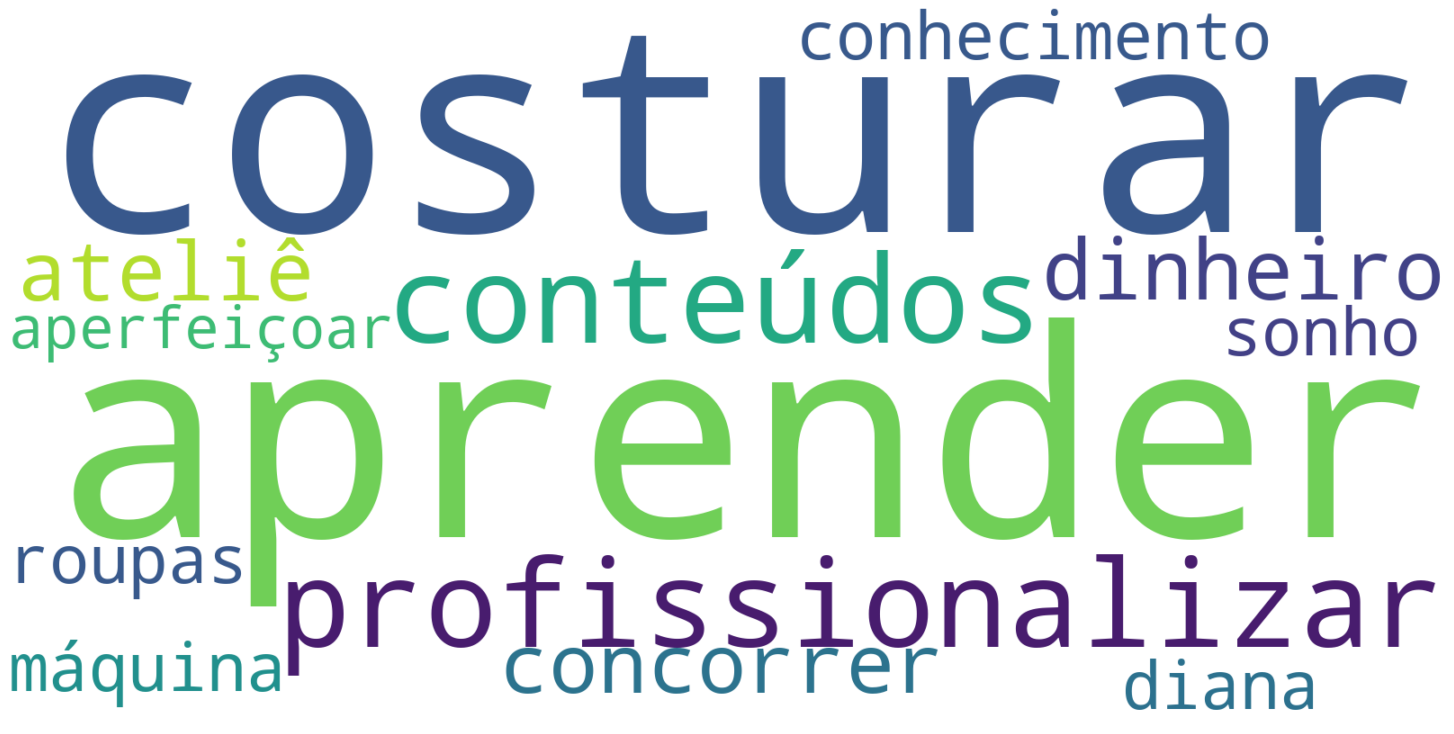

In [37]:
#obs: o frequency_word.most_common(30) vai pegar os 30 valores que mais aparecem no seu dataframe
#Nuvem de palavras:
text = '  '.join([j for j in df_wordsC12['Words']])
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# C13 - Como você FICOU SABENDO da 3ª Edição DA COSTURA?

In [38]:
df['C13'].fillna('Faltante', inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C13'] = linha['C13'].strip() + '.'
        
sent_C13 = df['C13'].str.cat(sep=' ')  

tokensC13Sent = nltk.tokenize.sent_tokenize(sent_C13)

frequency_C13_sent = nltk.FreqDist(item for item in tokensC13Sent)

df_C13sent = pd.DataFrame(frequency_C13_sent.most_common(4),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C13sent.Sentenca,
               values = df_C13sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Como você ficou sabendo da 3ª Edição DA COSTURA?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)
#pyo.plot(fig)

# C14 - Há quanto TEMPO você costura?

In [39]:
df['C14'].fillna('Faltante', inplace=True)
df.drop(df[df.C14 == 'Faltante'].index , inplace=True)

for indice, linha in df.iterrows():
      df.at[indice, 'C14'] = linha['C14'].strip() + '.'
        
sent_C14 = df['C14'].str.cat(sep=' ')  

tokensC14Sent = nltk.tokenize.sent_tokenize(sent_C14)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC14Sent = [i.lower() for i in tokensC14Sent if not i.lower() in stopwords]

frequency_C14_sent = nltk.FreqDist(item for item in tokensC14Sent)
df_C14sent = pd.DataFrame(frequency_C14_sent.most_common(7),
                    columns=['Tempo', 'Frequencia']).set_index('Frequencia').reset_index()

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C14sent.Tempo,
               values = df_C14sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Há quanto TEMPO você costura?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# C15 - Como você COMEÇOU a costurar ou por que está querendo começar agora?


In [40]:
df['C15'].fillna('Faltante', inplace=True)
df.drop(df[df.C15 == 'Faltante'].index , inplace=True)
import re
text_wordsC15 = df['C15'].str.cat(sep=' ')

text_wordsC15 = re.sub(r'[.,),:;(]', ' ', text_wordsC15)
wordsC15 = nltk.tokenize.word_tokenize(text_wordsC15)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
wordsC15 = [i.lower() for i in wordsC15 if not i.lower() in stopwords]

frequency_wordC15 = nltk.FreqDist(item for item in wordsC15)

df_wordsC15 = pd.DataFrame(frequency_wordC15.most_common(50),
                    columns=['Words', 'Frequency']).set_index('Frequency').reset_index()

df_wordsC15


,Frequency,Words
0,2409,comecei
1,2052,costura
2,1964,fazer
3,1748,costurar
4,1698,roupas
5,1588,sempre
6,1500,aprender
7,1366,mãe
8,1349,pra
9,1215,quero


In [41]:
df_wordsC15 = df_wordsC15.loc[[3,6,7,11,12,19,22,25,26,29,30,32,35,39,46,47]] 

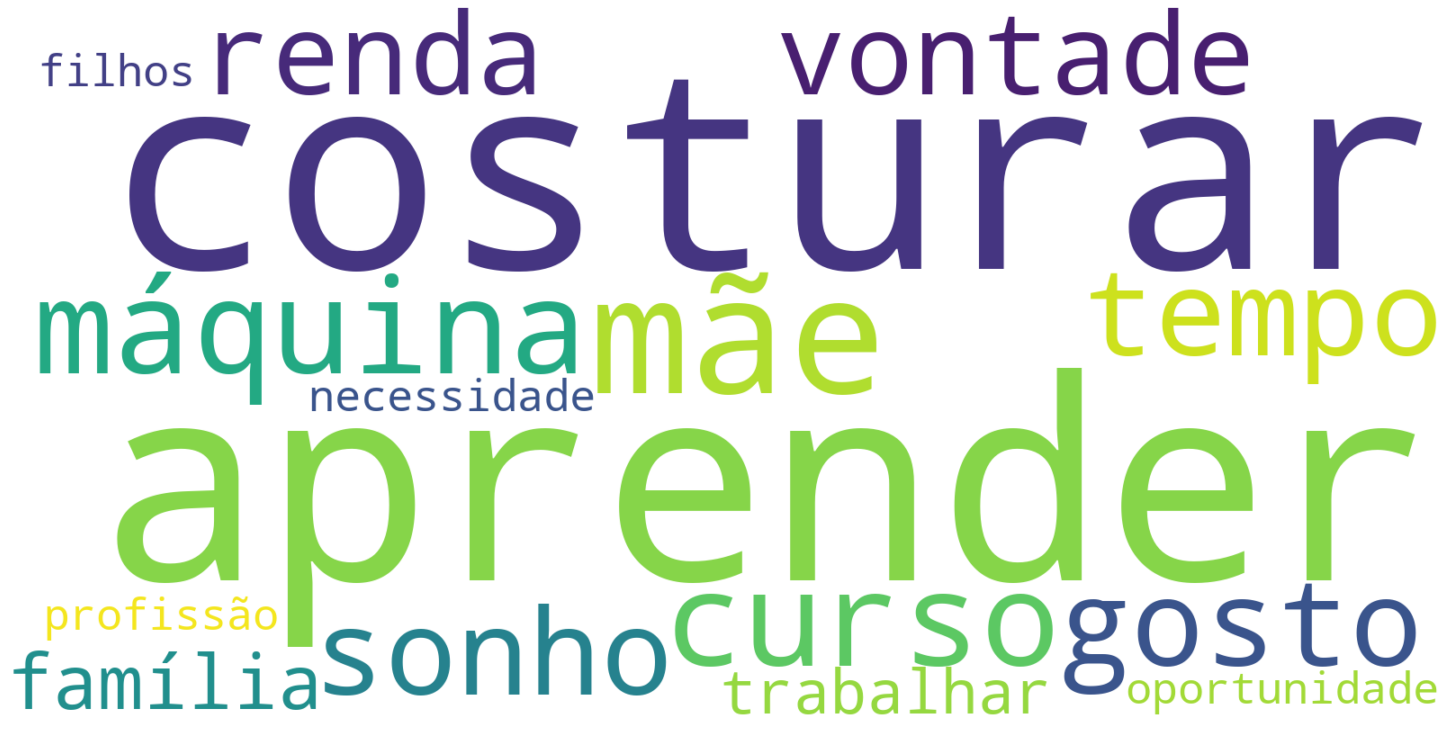

In [42]:

#obs: o frequency_word.most_common() vai pegar os valores que mais aparecem no seu dataframe
#Nuvem de palavras:
text = '  '.join([j for j in df_wordsC15['Words']])
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# C16 - Por que a COSTURA é importante para você e o que ela significa na SUA VIDA?



In [43]:
from collections import OrderedDict
dataC16 = OrderedDict(
    {
        
        'descrição': ['Amor','A costura acalma','Ser profissional','Independência financeira','Tranquilidade','Realização'
                     ,'Liberdade', 'Sonho', 'Cura', 'Terapia', 'Bem estar', 'Qualidade de vida', 'Alegria', 'Admiração' ]
        
    })

dataC16 = pd.DataFrame(dataC16)

dataC16

,descrição
0,Amor
1,A costura acalma
2,Ser profissional
3,Independência financeira
4,Tranquilidade
5,Realização
6,Liberdade
7,Sonho
8,Cura
9,Terapia


In [44]:
df['C16'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C16 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C16'] = linha['C16'].strip() + '.'
       
sent_C16 = df['C16'].str.cat(sep=' ') 


In [45]:
sent_C16

'E amor. Gosto. Significa paz. Forma de  ganhar   dinheiro. Uma terapia. Terapia. Aumenta o leque de produtos para serem ofertados. Costura dá autonomia e liberdade. A costura mudou minha vida, é minha terapia e ao mesmo tempo meu trabalho, amo o que faço.. Realização. Aprendizado. Pq virou uma terapia pra mim mim momento difícil da minha  vida. Pq amo costurar, significa trabalhar com prazer. Significa realizar sonhos, ser profissional e amar o trabalho e ver o quanto à costura transforma.. É útil e agradável. Bem estar. Eu gosto. Porque gosto do que faço. É um meio de se sentir útil podendo fazer peças para as pessoas. um rob. Fazer minhas próprias peças. Por que e bom ter um coisa a mais pra fazer significa um aprendizado .. Me distrai muito.. Amo costurar me faz bem. Prazer ! Relaxar! Esquecer da vida lá fora. Através da Costura ajudei em casa e depois casei e criei meu filho com a Costura. Pra mim é uma terapia. Costura para ocupar a mente. Pq a gente pode usar imaginaçao. Tudo né

In [46]:
print(df["C16"].unique().shape[0])

9653


In [47]:
# Eu utilizei uma taxa de semelhança  de 50%.
for i in dataC16['descrição']:
     replace_matches_in_column(data=df, column='C16', 
                             string_match=i, min_ratio=50)

Amor : ['E amor.', 'Tudo, meu maior sonho, o que eu mais quero fazer. Costura é 100% autenticidade e mto amor..', 'Minha avó e minha tia costuravam  Amor saudades.', 'Um grande amor,amo costurar e através da costurar conseguir muito e pretendo seguir.', 'É mais que uma profissão. É a externalização da criatividade, amor e uma forma de dar um pedaço de si para cada peça pronta..', 'Porque além do amor que tenho no que faço a costura e minha fonte de renda.', 'Eu sou fascinada no universo da costura, a costura pra mim significar amor. Por que sou apaixonada pela costura.', 'A costura é um meio de transformar a imaginação em realidade por meio de peças de roupas.\nNa minha vida significa amor por que foi assim q fui ensinada por minha mãe e avó..', 'Por que a cada peça q faço é mais uma vitória na minha vida, mais sabedoria, mais amor, ainda n sei responder, mas significa uma futura carreira.', 'Porque adora poder fazer minha propria roupas e costura e minha inspiracao pra ver a vida mais

A costura acalma : ['A costura acalma. A gente relaxa quando esta na máquina.', 'A costura além de trazer benefícios à saúde e uma profissão maravilhosa.', 'No momento a costura para mim é um hobby, adoro estar costurando e vendo o tecido se transformar..', 'A costura me acalma, é vida pra mim.\nMuda meus pensamentos vazios.', 'Eu gosto muito de costura atualmente faço bastante conserto e máscaras.', 'Acho a costura algo muito incrível com pedaços de tecido podemos construir peças extraordinárias.E com um pequeno espaço podemos mudar a nossa vida financeira..', 'A costura para mim é uma paixao sem explicaçao desde novinha sempre costei ñ sei de onde vem essa vontade pois sou a unica da familia q costura.', 'Me apaixonei pela costura é cada dia um novo aprendizado.', 'A costura me acalma e me transporta para um mundo que eu me sinto única e feliz. Me sinto realizada quando estou sentada em frente à uma máquina..', 'A costura para mim é uma complementação da renda e a meditação.', 'Sou a

Ser profissional : ['Gosto bastante e quero ser profissional pois me faz muito bem.', 'Sempre desejei ser uma costureira,desde criança,qdo via minha mãe costurar, é muito importante, quero ser profissional; não sei cortar uma peça, más sei como usar uma máquina simples,como a doméstica..', 'N.', 'Quero ser profissional pra vender minhas próprias roupas.', 'profissional.', 'Quero ser profissional e amo costurar  p mim é  uma terapia.', 'A importância da costura é deixar  clientes satisfeitos. Ela significa na minha vida o reconhecimento de ser profissional..', 'Sempre quiz aprender a costura desde pequena e agora com esses cursos tem me possibilitado aprender profissionalmente.', 'Continua um sonho da minha mãe ela so não era profissional mas dava seu jeito nas costura ..', 'Creio que ela pode me ajudar a cresce profissionalmente.', 'Porque ela é um meio para se profissionalizar , e ganhar sua própria independência financeira..', 'A boa aparência e importante na vida de qualquer profiss

Independência financeira : ['Independência.', 'Independência financeira.', 'E uma forma de ter uma independência financeira.', 'Liberdade para criar,,independência financeira e uma terapia.', 'Porque gosto de costurar,e significa minha independência financeira.', 'Minha independência financeira.', 'Minha independência financeira para poder ter mais tempo para cuidar do meu pai que estar velhinho.', 'A costura significa minha independência financeira.', 'Ela é importante porque posso ter minha independência financeira, pois posso ser dona do meu próprio negócio. A costura significa um Dom pelo qual eu não sabia que teria, apesar de minha avó ser uma excelente costureira. Daí vir que na costura posso descobrir muitas coisas, além do meu sustento mais também descobrir que amo costurar..', 'Realização de um sonho, independência financeira.', 'Costurar me faz ter muitas ideias , é um trabalho que me identifiquei fazendo sempre feliz , e com isso quero independência financeira.', 'Tenho difi

Tranquilidade : ['Tranquilidade..', 'Significa liberdade ,tranquilidade,terapia e muito bom costurar quando costuro esqueço  de tudo..', 'Hoje se tornou o motivo da minha tranquilidade....', 'Sinto tranquilidade quando estou costurando.', 'Trabalhos manuais me trazem tranquilidade.', 'Significa tranquilidade.', 'É importante porque nus traz uma oportunidade única. Traz prazer tranquilidade ,faz bem .cura a alma .A costura mudou minha maneira de pensar .tenho certeza que posso aperfeiçoar, encontrar um caminho de sucesso . A costura nus dar oportunidade de crescer..', 'Tranquilidade e futuro..', 'sempre me trouxe tranquilidade ao costurar.', 'Para que eu possa ficar com minha família.e me trouxe  muita tranquilidade.', 'Tenho muito praser em costurar e mim trás tranquilidade e paz.', 'Significa tranquilidade.qualidade de vida.', 'Me traz paz e tranquilidade.', 'Para interagir com outras pessoas, saúde e tranquilidade.', 'Costurar é uma terapia gostosa, traz tranquilidade, será realizar 

Realização : ['Recomeço realização.', 'Sempre tive vontade,uma realização.', 'Traz uma realização em conseguir fazer o que vou vestir.', 'Porque me distrai bastante, significa realização.', 'Realização, capacidade de fazer algo por mim mesma..', 'Pra me sentir capaz . É realização. Ver um tecido se transformar numa peça é fantástico..', 'Me traz prazer em transformar pequenos tecidos em grandes obras. Realização..', 'Eu gosto muito de olhar uma peça que costurei pronta e sentir que aquilo não existia no mundo até eu fazer. É  um sentimento bobo, mas me dá muito orgulho e a sensação de realização e capacidade..', 'Realização, é algo q me dá prazer fazer..', 'Realização, um sonho..', 'Para uma realização.', 'Uma realização.', 'Liberdade e a realização de um sonho de infância.', 'Temos necessidade de alguém que costure nossos hábitos religiosos, mas acima de tudo é uma grande conquista em minha vida. A realização de um sonho que tenho desde adolescente..', 'Significa superação, aprendizad

Liberdade : ['Liberdade de escolha.', 'Liberdade, trabalho com prazer mesmo quando sei que cobrei pouco.', 'Liberdade de escolher como quiser ...', 'ser capaz de me vestir como gosto e liberdade de fazê-las com gosto.', 'Liberdade de fazer suas próprias roupas.', 'Liberdade em criar.', 'Liberdade, poder costurar quando eu quiser.', 'Sonho, liberdade..', 'Liberdade de horários.', 'Liberdade e conhecimento.', 'Liberdade e estilo próprio..', 'Liberdade de usar o que eu gostar.', 'Liberdade para criar meus próprios modelos.', 'Liberdade para escolher as roupas q uso.', 'Pra mim representa liberdade e auto estima. Tenho um corpo padrão que se adequa à moda varejista atual, e gostaria que outras pessoas, cujos corpos não estão nesse padrão, pudessem se sentir melhor com seus próprios corpos através das minhas criações.', 'Liberdade, conquista..', 'Significa liberdade para me vestir bem, sou gorda e comprar boas peças para gordo em minha cidade é difícil..', 'Uma Arte, um rob, terapia, um mei

Sonho : ['Um sonho!.', 'Um sonho.', 'Um sonho de menina sempre quis aprender!.', 'Sonho de aprender costurar.', 'Eu tenho o sonho de fazer minhas próprias roupas.', 'Sonho de vida.', 'Prazer e sonho.', 'Poder fazer modelos únicos,  um sonho.', 'Sempre quis costurar. Um sonho.', 'Me identifico muito,sonho desde criança.', 'Significa parte da minha vida, dos meus sonhos..', 'É um sonho que eu sempre quiz era saber costura.', 'É um sonho costurar a própria roupa,eu vou me sentir muito orgulhosa.', 'Meu sonho é fazer o vestido da minha filha de 15 anos.', 'Pq gosto e e meu sonho.', 'Minha mãe costurava e eu amava tudo no criar e fz os tecidos ganhar vida, só que infelizmente não tive a chance de aprender com ela, sempre foi meu sonho aprender a criar..', 'Um de vários sonhos que tenho.', 'Um sonho acho maravilhoso criar modelos fazer sua própria roupa.', 'Poder construir sonhos.', 'E um sonho meu.', 'Um sonho sempre quis costurar.', 'É um sonho meu..', 'É um sonho antigo.', 'É um sonho, se

Cura : ['Gosto muito, minha mãe e duas irmãs costuravam  sem terem feito curso, eram boas, muito procuradas. Sabiam fazer moldes.', 'Porque é um trabalho bastante procurado.', 'Significa a minha cura.', 'A costura acalma', 'Costura para ocupar a mente.', 'A costura representa minha história. Acho incrível a construção de uma peça. É a hora que eu esqueço dos problemas.', 'Me identifiquei com a arte de criar estilo.', 'A costura hoje é que me mantém em pé.', 'É gratificante costurar.', 'Criar coisas . Criar roupas .....', 'Porque eu gosto de custurar.', 'Tudo que envolve costura me encanta e também é uma forma de refugio pra mim, um lugar seguro..', 'Costurar é uma arte ,meu mundo.', 'Descobri que sou apaixonada por costura.', 'costurar pra mim E VIDA.', 'Gosto de costura.', 'Costurar e arte de expressar os sentimentos através das linhas e agulhas ?.', 'Minha mãe  costurava nossas roupas. Sempre tive o desejo de aprender..', 'Me sinto bem costurando.', 'Costura no momento é tudo pra mim

Terapia : ['Na verdade tudo começo com venda de roupas a 1 um ano dair mim enteresei a costura , daí pedi a minha vizinha pra mim ensinar a costura .e ver video no Youtube foi onde eu comecei a Diana dermarque .vi os vídeos dele e as aulas já na 2 quarentena da costura  fiz minha primeira blusa e né que deu certo fiquei tão feliz , daí  véi próstata pra se cmc  foi bom pra muita jente e ruim pra  porque ainda dava pra fase parte  de uma cmc minha renda e muito pouco não dar nem pra mim compra uma máquina ? mais não fico triste o bom e que ainda dar ver os vídeos da Diana  , porque eu costuro ,porque eu tenho amor a costura ..a costura server como uma  terapia.', 'Significa fazer minhas roupas mais em conta e uma ótima terapia.', 'Hobby, terapia e me liga à minha mãe que era uma costureira de mão cheia e autodidata.', 'Está sendo uma terapia, um momento de lazer..', 'Terapia e dinheiro.', 'Uma diversão, uma terapia uma paixão.', 'Me destrai é  uma terapia e um modo de ganhar meu dinheir

Bem estar : ['Bem estar.', 'Ganhar dinheiro... bem estar.', 'Hobby e bem estar.', 'Por que consigo expressar  meus sentimentos através dela. Significa bem estar.', 'Costura para mim é um prazer, uma terapia, uma forma de economizar, pois amo moda e gosto de estar bem vestida. Quando término uma peça me sinto satisfeita. Caso a peça não fique boa, eu consigo transformá -la em outra peça. É magnífico isso!.', 'Ela é meu trabalho.significa muito prá mim ter um ótimo acabamento é uma roupa bem feita é tudo.', 'Me sinto bem vestindo o que faço,  mesmo não saindo da forma ideal.', 'Gosto de uma roupa bem feita ,caimento, modelos diversificado e dizer eu consegui fazer.', 'Quero estar sempre bem vestida e poder fazer para meus netos.', 'Porque gosto de sempre estar fazendo coisas para mim e para o meu lar.', 'Um meio de renda que eu gosto de fazer sem estresse.', 'Gosto muito de moda, e estar sempre com uma roupa nova e diferente..', 'Acho lindo uma pessoa faser roupas bem feitas. Sig.ser liv

Qualidade de vida : ['Rede de vida.', 'Mudar de vida.', 'Mudanças de vida.', 'Mudança  de vida.', 'Mudança de vida.', 'Significa mudança de vida.', 'É uma chance de mudar de vida.', 'significa uma possível mudança de vida para melhor.', 'Vi como meio de vida e vai significar uma mudança de vida.', 'Um mudança de vida pra melhor.', 'Quero mudança de vida através de meu trabalho.', 'Uma mudança de vida.', 'Significa uma nova chance de vida.', 'Superação e mudança de vida..', 'Importante é algo que eu sempre quis fazer, mais por não ter condições de comprar uma máquina fiquei sempre deixando isso de lado. Ela significa uma opinião de mudar de vida, quem saber até de uma opinião de ter meu próprio negócio..', 'Minha mudanca de vida pra melhor.', 'Um meio de vida.', 'Parte de mi.', 'Porque é uma coisa que gosto, e posso  expor minhas ideias de moda,.', 'Significa meu meio de vida e algo muito prazeroso ,pq eu realmente gosto do que faço , não me imagino fazendo outra coisa.', 'É importante,

Admiração : ['So admiro.', 'Distração e me ajuda um pouco nas despesas..', 'Distração e econômia.', 'Relaxamento, distração.', 'Dom.', 'É tão gratificante quando você vê que conseguiu fazer uma roupa do jeito que você queria, bom pra mim não tem alegria maior e é tão bom quando as pessoas também te elogia pelo belo trabalho que fez, fico tão feliz. Significa não só meu sustento mais também é algo que eu amo fazer porque é atravéz de panos que saem uma obra de arte que são as roupas, e as roupas é uma obra de arte pra ser admirada..', 'Admiro a  costura e tive interesse em começar a costurar por terapia r e com essa pandemia foi o que salvou pra manter as contas em dia e ficar próximo da minha família e ganhar dinheiro pra pagar a escola da minha filha que eu amo tanto.', 'Por causa da minha mae ,minha maior inspiração.', 'É minha motivação..', 'A costura e de uma geração na minha família há um bom tempo, e minha vó que hoje já é falecida sempre falava que queria ver uma das netas costu

In [48]:
print(df["C16"].unique().shape[0])

785


In [49]:
tokensC16Sent = nltk.tokenize.sent_tokenize(sent_C16)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC16Sent = [i.lower() for i in tokensC16Sent if not i.lower() in stopwords]

frequency_C16_sent = nltk.FreqDist(item for item in tokensC16Sent)

df_C16sent = pd.DataFrame(frequency_C16_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

df_C16sent.head(10)

,Frequencia,Sentenca
0,48,terapia.
1,40,tudo.
2,38,liberdade.
3,35,independência.
4,25,amo costurar.
5,23,independência financeira.
6,23,eu amo costurar.
7,21,um sonho.
8,21,realização.
9,20,uma terapia.


In [50]:
for index, row in df_C16sent.iterrows():
    if index in (0,9):
        df_C16sent.at[index,'Sentenca'] = 'terapia.'

In [51]:
for index, row in df_C16sent.iterrows():
    if index in (3,5):
        df_C16sent.at[index,'Sentenca'] = 'independência.'

In [52]:
for index, row in df_C16sent.iterrows():
    if index in (4,6):
        df_C16sent.at[index,'Sentenca'] = 'amo costurar.'

In [53]:
df_C16sent = df_C16sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [54]:
df_C16sent

,Sentenca,Frequencia
0,amo costurar.,48
1,independência.,58
2,liberdade.,38
3,realização.,21
4,terapia.,68
5,tudo.,40
6,um sonho.,21


In [55]:
import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(x=df_C16sent.Frequencia,
               y=df_C16sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Por que a COSTURA é importante para você e o que ela significa na SUA VIDA?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)


# C17 - Quais os BENEFÍCIOS a costura traz ou trará para a sua vida?',

In [56]:
df['C17'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C17 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C17'] = linha['C17'].strip() + '.'

In [57]:
sent_C17 = df['C17'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC17Sent = nltk.tokenize.sent_tokenize(sent_C17.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC17Sent = [i.lower() for i in tokensC17Sent if not i.lower() in stopwords]

frequency_C17_sent = nltk.FreqDist(item for item in tokensC17Sent)

df_C17sent = pd.DataFrame(frequency_C17_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

#df_C11sent

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C17sent.Sentenca,
               values = df_C17sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Quais os BENEFÍCIOS a costura traz ou trará para a sua vida?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# C18 - Em que categoria de costureira você mais se encaixa?

In [58]:
df['C18'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C18 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C18'] = linha['C18'].strip() + '.'

In [59]:
sent_C18 = df['C18'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC18Sent = nltk.tokenize.sent_tokenize(sent_C18.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC18Sent = [i.lower() for i in tokensC18Sent if not i.lower() in stopwords]

frequency_C18_sent = nltk.FreqDist(item for item in tokensC18Sent)

df_C18sent = pd.DataFrame(frequency_C18_sent.most_common(8),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C18sent.Sentenca,
               values = df_C18sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Em que categoria de costureira você mais se encaixa?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# 19 - Quanto a COSTURA representa na sua renda?


In [60]:
df['C19'].fillna('Faltante', inplace=True)
df.drop(df[df.C19 == 'Faltante'].index , inplace=True)

for indice, linha in df.iterrows():
      df.at[indice, 'C19'] = linha['C19'].strip() + '.'
        
sent_C19 = df['C19'].str.cat(sep=' ')  


In [61]:
tokensC19Sent = nltk.tokenize.sent_tokenize(sent_C19)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC19Sent = [i.lower() for i in tokensC19Sent if not i.lower() in stopwords]

frequency_C19_sent = nltk.FreqDist(item for item in tokensC19Sent)
df_C19sent = pd.DataFrame(frequency_C19_sent.most_common(4),
                    columns=['Tempo', 'Frequencia']).set_index('Frequencia').reset_index()

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C19sent.Tempo,
               values = df_C19sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Quanto a COSTURA representa na sua renda?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# C20 - Atualmente, quanto você ganha com a COSTURA?

In [62]:
import numpy as np
to_str = lambda x: '' if type(x) == np.nan else str(x)

In [63]:
df['C20'].fillna('Faltante', inplace=True)
df.drop(df[df.C20 == 'Faltante'].index , inplace=True)

#for indice, linha in df.iterrows():
#      df.at[indice, 'C20'] = linha['C20'].strip() + '.'

#sent_C20 = df['C20'].str.cat(sep=' ') 

frequency_C20_sent = nltk.FreqDist(item for item in df['C20'])
df_C20sent = pd.DataFrame(frequency_C20_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

# Adicionando uma nova coluna coluna ao dataset
df_C20sent['Sentenca1'] = df_C20sent['Sentenca'].str.replace('.',',')

for indice, linha in df_C20sent.iterrows():
      df_C20sent.at[indice, 'Sentenca1'] = linha['Sentenca1'].strip() + '.'
        
sent_C20 = df_C20sent['Sentenca1'].str.cat(sep=' ')        

In [64]:
df_C20sent['Sentenca1'] = df_C20sent['Sentenca1'].apply(to_str)

In [65]:
df_C20sent

,Frequencia,Sentenca,Sentenca1
0,7258,Nada ainda,Nada ainda.
1,2201,Menos de R$ 500 por mês,Menos de R$ 500 por mês.
2,697,De R$ 500 a R$ 1.000 por mês,"De R$ 500 a R$ 1,000 por mês."
3,268,De R$ 1.000 a R$ 1.500 por mês,"De R$ 1,000 a R$ 1,500 por mês."
4,108,De R$ 1.500 a R$ 2.000 por mês,"De R$ 1,500 a R$ 2,000 por mês."
5,43,De R$ 2.000 a R$ 3.000 por mês,"De R$ 2,000 a R$ 3,000 por mês."
6,17,De R$ 3.000 a R$ 5.000 por mês,"De R$ 3,000 a R$ 5,000 por mês."
7,7,De R$ 5.000 a R$ 10.000 por mês,"De R$ 5,000 a R$ 10,000 por mês."
8,1,Acima de R$ 10.000 por mês,"Acima de R$ 10,000 por mês."


In [66]:
for index, row in df_C20sent.iterrows():
    if index == 2:
        df_C20sent.at[index,'Sentenca1'] = 'De RS500 a RS1.000 por mês.'
    elif index == 3:
         df_C20sent.at[index,'Sentenca1'] = 'De RS1.000 a RS1.500 por mês.'
    elif index == 4:
         df_C20sent.at[index,'Sentenca1'] = 'De RS1.500 a RS2.000 por mês.'
    elif index == 5:
         df_C20sent.at[index,'Sentenca1'] = 'De RS2.000 a RS3.000 por mês.'
    elif index == 6:
         df_C20sent.at[index,'Sentenca1'] = 'De RS3.000 a RS5.000 por mês.'
    elif index == 7:
         df_C20sent.at[index,'Sentenca1'] = 'De RS5.000 a RS10.000 por mês.'
                                                   

In [67]:
tokensC20Sent = nltk.tokenize.sent_tokenize(sent_C20)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC20Sent = [i.lower() for i in tokensC20Sent if not i.lower() in stopwords]

frequency_C20_sent = nltk.FreqDist(item for item in tokensC20Sent)

import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(y=df_C20sent.Sentenca1,
               x=df_C20sent.Frequencia,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Atualmente, quanto você ganha com a COSTURA?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#Plotando um gráfico de Pizza 
#trace = go.Pie(labels = df_C20sent.Sentenca1,
 #              values = df_C20sent.Frequencia,
  #             marker = {'line':{'color':'#000000','width':2}
 #                               },
 #              hoverinfo='label+percent+value',
#               direction='clockwise'
#)

#data = [trace]

#layout = go.Layout(title='Atualmente, quanto você ganha com a COSTURA?')

#fig = go.Figure(data=data, layout=layout)

#py.iplot(fig)

# C21 - Você está satisfeita com a renda que você obtém do seu trabalho com COSTURA?

In [68]:
df['C21'].fillna('Faltante', inplace=True)
df.drop(df[df.C21 == 'Faltante'].index , inplace=True)

for indice, linha in df.iterrows():
      df.at[indice, 'C21'] = linha['C21'].strip() + '.'
        
sent_C21 = df['C21'].str.cat(sep=' ')  


In [69]:
tokensC21Sent = nltk.tokenize.sent_tokenize(sent_C21)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC21Sent = [i.lower() for i in tokensC21Sent if not i.lower() in stopwords]

frequency_C21_sent = nltk.FreqDist(item for item in tokensC21Sent)
df_C21sent = pd.DataFrame(frequency_C21_sent.most_common(10),
                    columns=['Resposta', 'Frequencia']).set_index('Frequencia').reset_index()

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C21sent.Resposta,
               values = df_C21sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Você está satisfeita com a renda que você obtém do seu trabalho com COSTURA?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# C22 - Como você se sente na sua VIDA PROFISSIONAL?

In [70]:
#df['C22'].fillna('Faltante', inplace=True)
#df.drop(df[df.C22 == 'Faltante'].index , inplace=True)
#sentilexpt = open('SentiLex-flex-PT01','r')

In [71]:
#dic_palavra_polaridade = {}
#for i in sentilexpt.readlines():
#    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
#    palavra = (i[:pos_ponto])          # Pega a palavra
#    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
#    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
#    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [72]:
#print (dic_palavra_polaridade)

In [73]:
#def Score_sentimento(frase):
#    frase = frase.lower()                     # coloca toda a frase em minusculo
#    l_sentimento = []                         # cria uma lista vazia
#    for p in frase:
#        l_sentimento.append(int(dic_palavra_polaridade.get(p,0)))      # para cada palavra obtem a polaridade
#    print (l_sentimento)                                                # imprime a lista de polaridades
#    score = sum(l_sentimento)                                           # soma todos os valores da lista
#    if score > 0:
#        return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
#    elif score == 0:
#        return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
#    else:
#        return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'

In [74]:
#df['C22'].fillna('Neutro', inplace=True)

#for indice, linha in df.iterrows():
#      df.at[indice, 'C22'] = linha['C22'].strip() + '.'
        
#sent_C22 = df['C22'].str.cat(sep=' ')  

#tokensC22Sent = nltk.tokenize.sent_tokenize(sent_C22)

#stopwords = set(nltk.corpus.stopwords.words('portuguese'))
#tokensC22Sent = [i.lower() for i in tokensC22Sent if not i.lower() in stopwords]



In [75]:
#listaC22 = [] 
#listaC22 = tokensC22Sent
#listaC22

In [76]:
#Score_sentimento('desavergonhados,desavergonhado')

# C23 - Você gostaria de que a COSTURA fosse sua principal profissão e fonte de renda?



In [77]:
princfonterenda = df.groupby(by='C23').C23.count()
data = [go.Bar(x=princfonterenda.index,
               y=princfonterenda.values)]

configuracoes_layout = go.Layout(title='Você gostaria de que a COSTURA fosse sua principal profissão e fonte de renda?',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Resposta'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#pyo.plot(fig)

# C24 - Quanto você GOSTARIA DE GANHAR por mês no seu trabalho com COSTURA?



In [78]:
df['C24'].fillna('Faltante', inplace=True)
df.drop(df[df.C24 == 'Faltante'].index , inplace=True)

#for indice, linha in df.iterrows():
#      df.at[indice, 'C20'] = linha['C20'].strip() + '.'

#sent_C20 = df['C20'].str.cat(sep=' ') 

frequency_C24_sent = nltk.FreqDist(item for item in df['C24'])
df_C24sent = pd.DataFrame(frequency_C24_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

# Adicionando uma nova coluna coluna ao dataset
df_C24sent['Sentenca1'] = df_C24sent['Sentenca'].str.replace('.',',')

for indice, linha in df_C24sent.iterrows():
      df_C24sent.at[indice, 'Sentenca1'] = linha['Sentenca1'].strip() + '.'
        
sent_C24 = df_C24sent['Sentenca1'].str.cat(sep=' ')  

In [79]:
df_C24sent.head(10)

,Frequencia,Sentenca,Sentenca1
0,2178,De R$ 2.000 a R$ 3.000 por mês,"De R$ 2,000 a R$ 3,000 por mês."
1,1887,De R$ 1.500 a R$ 2.000 por mês,"De R$ 1,500 a R$ 2,000 por mês."
2,1792,De R$ 3.000 a R$ 5.000 por mês,"De R$ 3,000 a R$ 5,000 por mês."
3,1500,De R$ 1.000 a R$ 1.500 por mês,"De R$ 1,000 a R$ 1,500 por mês."
4,1277,De R$ 500 a R$ 1.000 por mês,"De R$ 500 a R$ 1,000 por mês."
5,728,De R$ 5.000 a R$ 10.000 por mês,"De R$ 5,000 a R$ 10,000 por mês."
6,612,Acima de R$ 10.000 por mês,"Acima de R$ 10,000 por mês."


In [80]:
for index, row in df_C24sent.iterrows():
    if index == 0:
        df_C24sent.at[index,'Sentenca1'] = 'De RS2.000 a RS3.000 por mês.'
    elif index == 1:
         df_C24sent.at[index,'Sentenca1'] = 'De RS1.500 a RS2.000 por mês.'
    elif index == 2:
         df_C24sent.at[index,'Sentenca1'] = 'De RS3.000 a RS5.000 por mês.'
    elif index == 3:
         df_C24sent.at[index,'Sentenca1'] = 'De RS1.000 a RS1.500 por mês.'
    elif index == 4:
         df_C24sent.at[index,'Sentenca1'] = 'De RS500 a RS1.000 por mês.'
    elif index == 5:
         df_C24sent.at[index,'Sentenca1'] = 'De RS5.000 a RS10.000 por mês.'

In [81]:
tokensC24Sent = nltk.tokenize.sent_tokenize(sent_C24)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC24Sent = [i.lower() for i in tokensC24Sent if not i.lower() in stopwords]

frequency_C24_sent = nltk.FreqDist(item for item in tokensC24Sent)

data = [go.Bar(y=df_C24sent.Sentenca1,
               x=df_C24sent.Frequencia,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Quanto você GOSTARIA DE GANHAR por mês no seu trabalho com COSTURA?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#Plotando um gráfico de Pizza 
#trace = go.Pie(labels = df_C24sent.Sentenca1,
#               values = df_C24sent.Frequencia,
#               marker = {'line':{'color':'#000000','width':2}
##                                },
#               hoverinfo='label+percent+value',
#               direction='clockwise'
#)

#data = [trace]

#layout = go.Layout(title='Quanto você GOSTARIA DE GANHAR por mês no seu trabalho com COSTURA?')

#fig = go.Figure(data=data, layout=layout)

#py.iplot(fig)

# C25 - Quando você começar a ganhar de R$ 2.000 a R$ 5.000 por mês com a costura, como você pretende usar esse dinheiro?



In [82]:
from collections import OrderedDict
dataC25 = OrderedDict(
    {
        
        'descrição': ['Investimento','Conforto e lazer','Realizar sonho','Melhorar de vida','Abrir um Ateliê',
                      'Pagar as Contas', 'Me especializar', 'Estabilidade', 'Carro', 'Aperfeiçoar', 'Pagar a faculdade']
        
    })

dataC25 = pd.DataFrame(dataC25)

dataC25

,descrição
0,Investimento
1,Conforto e lazer
2,Realizar sonho
3,Melhorar de vida
4,Abrir um Ateliê
5,Pagar as Contas
6,Me especializar
7,Estabilidade
8,Carro
9,Aperfeiçoar


In [83]:
df['C25'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C25 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C25'] = linha['C25'].strip() + '.'
       
sent_C25 = df['C25'].str.cat(sep=' ') 


In [84]:
print(df["C25"].unique().shape[0])

8149


In [85]:
# Eu utilizei uma taxa de semelhança  de 50%.
for i in dataC25['descrição']:
     replace_matches_in_column(data=df, column='C25', 
                             string_match=i, min_ratio=50)

Investimento : ['Investimentos, meu próprio sustento.', 'Com minha casa, meus objetivos pessoas, investimentos... Etc.', 'Investimentos!.', 'Investimento empresarial e familia.', 'investimento.', 'Investimento.', 'Investimento na bolsa e em um ateliê.', 'Investimento na produção, com materiais, e melhoria de máquinas..', 'Investimento nos estudos.', 'Investimento em materiais e o que for necessário.', 'Investimento em estudos dos filhos.', 'Para investir na minha formação como designer de costura e para realizar outros investimentos..', 'Investimento na costura e no bem estar do meu filho..', 'Para Investimentos.', 'Fazer mais investimentos.', 'Investimento em materiais.', 'Investimento. Na costura.', 'UMA PARTE FICARIA GUARDADA E OUTRA FARIA INVESTIMENTOS NO ATELIE..', 'Investimento no ateliê, mais conhecimento como bordado, croqui....', 'Investimento em mim.', 'Investimento e sustento.', 'Metade em investimentos e a outra metade com minha família.', 'Em investimentos.', 'Pagar contas

Conforto e lazer : ['Conforto e lazer.', 'Lazer.', 'conforto.', 'lazer.', 'Conforto.', 'Investir em uma moradia melhor, ter mais conforto e fazer uma reserva de emergência.', 'Em lazer.', 'Para ter mais conforto. E ter mais liberdade.', 'Ter um conforto melhor.', 'Para meu conforto e de minha família.', 'Investir, economizar, lazer..', 'Para ter conforto. E viajar com meus familiares..', 'Realizando meus sonhos(familia) e trazer conforto e educação melhor para meus filhos.', 'Para aproveitar mais em viagem com minha família, momentos de lazer, que hoje não podemos porque só o marido trabalha e o que ganho ainda é pouco. E também penso em fazer algo para crianças carentes, um projeto social que ainda está em planejamento..', 'No lazer.', 'Fazer meu próprio ateliê em casa para ter mais conforto pra elaborar minhas peças.', 'Investir sempre na minha qualificação profissional, conquistar de uma vez minha independência financeira e tb dar conforto e educação pra minhas 2 filhas.', 'Com cert

Realizar sonho : ['Ajudar meus filhos na faculdade e realizar sonhos.', 'Realizar sonhos..', 'Realizar sonhos guardados.', 'Pretendo realizar sonhos que ainda não consegui.', 'Realizar sonhos que ainda não pude.', 'Gradativamente, realizar sonhos sao muitos..', 'Realizar sonhos viajar, poupar pra velhice.', 'Realizar sonhos.', 'Ajuda Pessoa  realiza sonhos pe.', 'Quero realizar o sonho da casa própria.', 'Ajudar na renda e realizar o sonho de construir a casa da minha familia.', 'Gostaria de ajudar pessoas a realizarem sonhos possíveis..', 'Pretendo usar para educação dos meus filhos e pra realizar o sonho da casa própria.', 'Realizar o sonho  da casa própria..', 'Realizar o sonho de um carro casa reformada e poder ajudar alguém.', 'Realizar o sonho de ter um atelier.', 'Realizar os sonhos de outras pessoas.', 'Realizar um sonho de comprar minha casa.', 'Realizando sonhos  que  se perderam e ajudando  minha  família.', 'Nossa, quero guardar uma parte por mês para realizar um sonho de i

Melhorar de vida : ['Investir e melhorar de vida.', 'Melhorar de vida.', 'investir nisso e melhorar de vida.', 'Investir na minha profissão e melhorar de vida.', 'Melhoria de vida familiar..', 'Para montar meu ateliê de costura... Melhoria de vida....', 'Finanças, despesas e melhoria de vida!.', 'Na melhoria de vida da minha família.', 'Pretendo usá-lo para ter um padrão melhor de vida.', 'Quero melhorar a vida das minhas filhas.', 'Para sustento meu e de minha família e dar uma qualidade melhor de vida para os meus pais.', 'Para melhorar a vida da minha familia.', 'Melhorar a vida de minha família.', 'Quero ajudar melhorar a vida de meus filhos e ter melhor qualidade de vida.', 'Para melhorar a vida da minha família e pagar os estudos das minhas filhas..', 'Para melhorar a vida de algumas pessoas da família..', 'Melhorar a vida da minha família.', 'Melhorar a vida dos meus filhos.', 'Quero comprar máquinas novas, melhorar a vida da minha família, e se possível comprar um carro para sa

Abrir um Ateliê : ['Investir para ter meu próprio negócio, abrir um ateliê,quem sabe.', 'Abrir um ateliê e uma loja com minhas peças.', 'Para abrir um ateliê.', 'Pretendo investir ainda mais em mim, na minha família, pretendo abrir um ateliê... necessito muito de um espaço silencioso e que me incentive a criar. Pretendo criar ações nesse ateliê de oficinas de artes, pintura, desenho, fotografia, costura, bordado.....', 'Abrir um ateliê em primeiro lugar.', 'Primeiro eu ia compra um lugar, pra abrir um ateliê pra me e contra novas custurera como eu..', 'Comprar minhas maquinas de costura. Porque no momento só tenho a doméstica, abrir um Ateliê. E investir em cursos. Depois comprar uma casa, e muitas outras coisas..', 'Abrir um ateliê.', 'Quer compra uma casa pra montar dois negocio \nAbrir um ateliê bem grande.', 'Quero abrir um ateliê.', 'Abri um ateliê..', 'Primeiro pagar o meu convenio médico, e o restante investir nas costuras talves abrir um atelier..', 'Aplicar uma parte ea outra 

Pagar as Contas : ['Quero ajudar a pagar as contas .... iinvestir um pouco na costura compranso uma maquina nova ....tentar.guardar um pouco kkkk.', 'Pagar as contas domesticas.', 'Paga as contas.', 'Ter uma vida financeira tranquila, sem ficar desesperada de como vou arrumar dinheiro para as contas.', 'Pagando as contas.', 'Ajudar em casa pagando as contas.', 'Pagando as contas, ajudando meu marido.', 'Pagar contas mensais e poupança.', 'Investindo e pagando as contas.', 'Comprar máquinas novas,pagar todas as minhas contas.', 'Pagar minhas contas sozinha e. Comprar minhas coisas.', 'Pagar consta necessária e guardar um pouco pro futuro.', 'Ajudar as netas a estudar e terminar no casa.', 'Pagar minhas contas.', 'Pagar nossas contas,pagar a faculdade da minha neta pagar aulas de natação pro meu neto pois tem problemas de bronquite.', 'Pagar aposentadoria, dividas e começar ajudar em casa, comprar 1 sofa 1 guarda roupas.', 'Para as coisas necessaria.', 'Pagar minhas contas investir mais 

Me especializar : ['Investindo em especialização e  no meu negócio em si.', 'Certamente, investindo na família e na qualidade dos meus produtos e serviços, através do conhecimento de novas técnicas, aprimoramento em cursos e especializações, da aquisição de máquinas, equipamentos e produtos afins com a costura..', 'Investir em máquinas, equipamentos, especializações, cursos e quem sabe fazer faculdade de moda..', 'Investindo em cursos de aperfeiçoamento, especializações,  matérias para montar meu negócio.', 'Econimizar.', 'Especializa mais e mais na área e arrumar minha casinha e ajuda minha mãe.', 'Ajudar em casa e também  ajudar os meus netinhos principalmente um que é  especial.', 'Guardar para alguma ocasião especial.', 'Em tudo que eu precisar.', 'Cuidar mais da minha filha que é 90 porcento,especia,.', 'Despesas.', 'No que precisar..', 'Meu Deus.', 'No que precisar.', 'Com muita sabedoria, no essencial.', 'Cuidando da nossa saúde física, mental e social. Investir um pouco também 

Carro : ['Casa , carro.', 'Ter uma casa e um carro.', 'Investir na casa ter um carro ter ótimo recurso financeiro.', 'Comprar um carro os irmãos da Igreja.', 'Comprando carro, móveis e bens imóveis!.', 'Pagando cursos para minha filha, ajudando na despesa de casa, quero ter meu carro próprio etc.......', 'Com mercados lojas carro saúde pets.', 'Sustento da casa, financiar meu carro.', 'Máquinas, tecidos e um carro.', 'Muitas coisas. Uma delas comprar uma casa e um carro com muita dedicação ao trabalho?..', 'Investir na minha casa própria e compra um carro.', 'Comprar um carro pra mim pode ser simples pra ajudar na minha costura.', 'Comprar minha casa própria e um carro..', 'Dando os 10% do Senhor em seguida repondo material necessário e ajudar meu esposo a comprar.o remédio do nosso filho que é muito caro....', 'Investir na carreira.', 'Sustento  da minha família...e em trabalho social nós bairros pobre.', 'Vou investir claro.', 'Investir na minha carreira profissional, que é na área d

Aperfeiçoar : ['Usar para aperfeiçoar neste seguimento.', 'Com aperfeiçoamento.', 'Aperfeiçoamento.', 'No aperfeiçoamento da costura, e em casa, com as despesas normais..', 'Me aperfeiçoando na costura e com minha família.', 'Investir em aperfeiçoamento da costura..', 'Me aperfeiçoando mais.', 'Me aperfeiçoando cada vez mais e em casa.', 'Novos aperfeiçoamentos, minha casa e família.', 'Em aperfeiçoamento em costura.', 'Aperfeiçoando e depois pra minhas despesas.', 'Investir em estudos e aperfeiçoamento.', 'Além de ajudar nas despesas de casa , investir em aperfeiçoamento  de costura..', 'Aperfeiçoamento ,máquinas e insumos.', 'Investindo em imóveis e aperfeiçoamento..', 'Aperfeiçoando cada dia mais meus negócios.', 'Aperfeiçoamento profissional!.', 'Me aperfeiçoando.', 'Aperfeicoamento profissional e um pouco de tempo p mim, pois normalmente trabalho 18h por dia ,as vezes sem fim de semana..', 'Me apefeiçoando.', 'Perfeito amento.', 'Ter calma e vê em que investir, aprimorar..', 'Eu a

In [86]:
print(df["C25"].unique().shape[0])


1308


In [87]:
tokensC25Sent = nltk.tokenize.sent_tokenize(sent_C25)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC25Sent = [i.lower() for i in tokensC25Sent if not i.lower() in stopwords]

frequency_C25_sent = nltk.FreqDist(item for item in tokensC25Sent)

df_C25sent = pd.DataFrame(frequency_C25_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

df_C25sent.head(10)


,Frequencia,Sentenca
0,70,investimento.
1,63,investir.
2,42,viajar.
3,33,não sei.
4,30,sim.
5,28,com minha família.
6,27,ainda não sei.
7,26,viajando.
8,25,investindo.
9,23,comprar uma casa.


In [88]:
for index, row in df_C25sent.iterrows():
    if index in (0,1,8):
        df_C25sent.at[index,'Sentenca'] = 'investimento.'    

In [89]:
for index, row in df_C25sent.iterrows():
    if index in (2,7):
        df_C25sent.at[index,'Sentenca'] = 'viajar.'  

In [90]:
for index, row in df_C25sent.iterrows():
    if index in (3,6):
        df_C25sent.at[index,'Sentenca'] = 'ainda não sei.'  

In [91]:
df_C25sent.drop(df_C25sent[df_C25sent.Sentenca == 'sim.'].index , inplace=True)

In [92]:
df_C25sent = df_C25sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [93]:
df_C25sent.head(10)

,Sentenca,Frequencia
0,ainda não sei.,60
1,com minha família.,28
2,comprar uma casa.,23
3,investimento.,158
4,viajar.,68


In [94]:
import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(x=df_C25sent.Frequencia,
               y=df_C25sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Quando você começar a ganhar de R 2.000𝑎𝑅  5.000 por mês com a costura, como você pretende usar esse dinheiro?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C26 - Quais são as PESSOAS que vão se beneficiar com o seu sucesso profissional na costura?



In [95]:
#TOP TERMOS
df['C26'].fillna('Faltante', inplace=True)
df.drop(df[df.C26 == 'Faltante'].index , inplace=True)

lista_palavrasC26 = []
for i in df.C26.items():
  lista_palavrasC26.append(i[1].split())

from functools import reduce
import operator
lista_palavrasC26 = reduce(operator.concat, lista_palavrasC26)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
lista_palavrasC26 = [i.lower() for i in lista_palavrasC26 if not i.lower() in stopwords]

from nltk.probability import FreqDist
frequencia = FreqDist(lista_palavrasC26)

# Top 30
frequencia.most_common(10)

[('família', 3489),
 ('filhos', 1247),
 ('familia', 833),
 ('marido', 469),
 ('clientes', 412),
 ('filha', 410),
 ('amigos', 399),
 ('pessoas', 378),
 ('eu,', 346),
 ('família.', 345)]

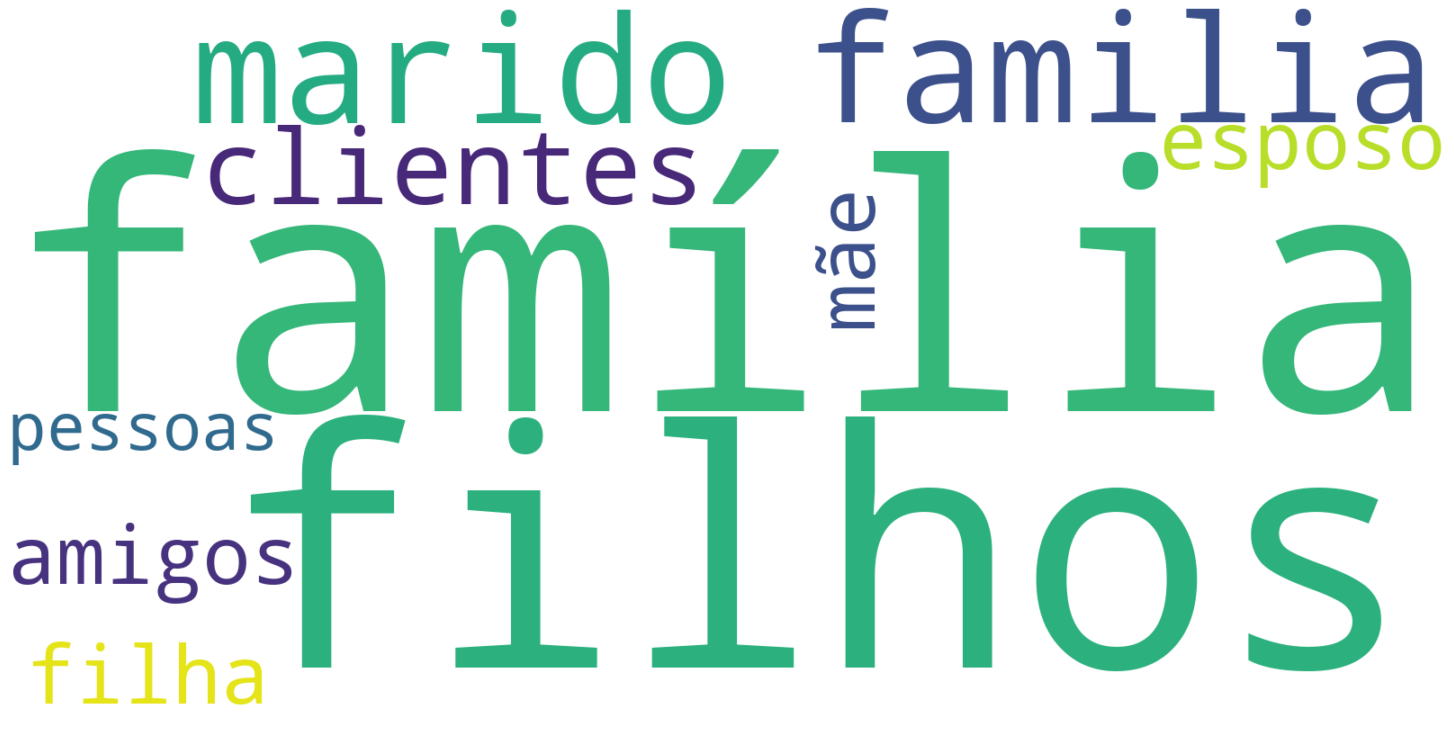

In [96]:
df['C26'].fillna('Faltante', inplace=True)
df.drop(df[df.C26 == 'Faltante'].index , inplace=True)
import re
text_wordsC26 = df['C26'].str.cat(sep=' ')

text_wordsC26 = re.sub(r'[.,),:;(]', ' ', text_wordsC26)
wordsC26 = nltk.tokenize.word_tokenize(text_wordsC26)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
wordsC26 = [i.lower() for i in wordsC26 if not i.lower() in stopwords]

frequency_wordC26 = nltk.FreqDist(item for item in wordsC26)
df_wordsC26 = pd.DataFrame(frequency_wordC26.most_common(10),
                    columns=['Words', 'Frequency']).set_index('Frequency').reset_index()

#obs: o frequency_word.most_common(10) vai pegar os 10 valores que mais aparecem no seu dataframe

#Nuvem de palavras:
text = '  '.join([j for j in df_wordsC26['Words']])
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# C27 - Quando você pensa no SEU FUTURO, COMO VOCÊ SE SENTE?



In [97]:
df['C27'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C27 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C27'] = linha['C27'].strip() + '.'

In [98]:
 sent_C27 = df['C27'].str.cat(sep=' ') 

tokensC27Sent = nltk.tokenize.sent_tokenize(sent_C27)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC27Sent = [i.lower() for i in tokensC27Sent if not i.lower() in stopwords]

frequency_C27_sent = nltk.FreqDist(item for item in tokensC27Sent)

df_C27sent = pd.DataFrame(frequency_C27_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

df_C27sent

,Frequencia,Sentenca
0,551,esperançosa.
1,489,feliz.
2,220,insegura.
3,188,realizada.
4,186,bem.
5,170,otimista.
6,170,confiante.
7,129,ansiosa.
8,127,preocupada.
9,98,tranquila.


In [99]:
import plotly.express as px
#fig = px.bar(df_C7sent, x='Profissao', y='Frequencia')
#fig.show()

data = [go.Bar(x=df_C27sent.Frequencia,
               y=df_C27sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Quando você pensa no SEU FUTURO, COMO VOCÊ SE SENTE?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C28 - Qual o seu maior MEDO? Aquela preocupação chata que te tira o sono às vezes?



In [100]:
df['C28'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C28 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C28'] = linha['C28'].strip() + '.'

In [101]:
 sent_C28 = df['C28'].str.cat(sep=' ') 

tokensC28Sent = nltk.tokenize.sent_tokenize(sent_C28)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC28Sent = [i.lower() for i in tokensC28Sent if not i.lower() in stopwords]

frequency_C28_sent = nltk.FreqDist(item for item in tokensC28Sent)

df_C28sent = pd.DataFrame(frequency_C28_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

df_C28sent

,Frequencia,Sentenca
0,86,falta de dinheiro.
1,74,dividas.
2,66,dívidas.
3,55,não tenho.
4,34,de não conseguir.
5,33,contas.
6,33,ficar doente.
7,32,saúde.
8,32,não conseguir.
9,31,não tenho medo.


In [102]:
for index, row in df_C28sent.iterrows():
    if index in (1,2,8):
        df_C28sent.at[index,'Sentenca'] = 'dívidas.'       


In [103]:
for index, row in df_C28sent.iterrows():
    if index in (4,5):
        df_C28sent.at[index,'Sentenca'] = 'ficar doente.'    
        

In [104]:
for index, row in df_C28sent.iterrows():
    if index in (3,7):
        df_C28sent.at[index,'Sentenca'] = 'não tenho medo.' 

In [105]:
for index, row in df_C28sent.iterrows():
    if index in (6,9):
        df_C28sent.at[index,'Sentenca'] = 'de não conseguir.' 

In [106]:
df_C28sent = df_C28sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [107]:
df_C28sent

,Sentenca,Frequencia
0,de não conseguir.,64
1,dívidas.,172
2,falta de dinheiro.,86
3,ficar doente.,67
4,não tenho medo.,87


In [108]:
#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C28sent.Sentenca,
               values = df_C28sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='Qual o seu maior MEDO? Aquela preocupação chata que te tira o sono às vezes?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


# C29 - Você gostaria de SAIR desse ISOLAMENTO da Pandemia tendo feito uma FORMAÇÃO PROFISSIONAL em costura, com seu Diploma Certificado?



In [109]:
#TOP TERMOS
df['C29'].fillna('Faltante', inplace=True)
df.drop(df[df.C29 == 'Faltante'].index , inplace=True)

lista_palavrasC29 = []
for i in df.C29.items():
  lista_palavrasC29.append(i[1].split())

from functools import reduce
import operator
lista_palavrasC29 = reduce(operator.concat, lista_palavrasC29)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
lista_palavrasC29 = [i.lower() for i in lista_palavrasC29 if not i.lower() in stopwords]

from nltk.probability import FreqDist
frequencia = FreqDist(lista_palavrasC29)

df_C29sent = pd.DataFrame(frequencia.most_common(5),
                    columns=['Resposta', 'Frequencia']).set_index('Frequencia').reset_index()

df_C29sent

,Frequencia,Resposta
0,8971,sim
1,30,quero
2,25,aprender
3,22,nao
4,19,talvez


In [110]:
for index, row in df_C29sent.iterrows():
    if index in (1,3):
        df_C29sent.at[index,'Resposta'] = 'sim' 

In [111]:
df_C29sent = df_C29sent.groupby('Resposta')['Frequencia'].sum().reset_index()

In [112]:
import plotly.express as px

data = [go.Bar(y=df_C29sent.Frequencia,
               x=df_C29sent.Resposta,
               orientation='v'
              )
            ]

configuracoes_layout = go.Layout(title='Você gostaria de SAIR desse ISOLAMENTO da Pandemia tendo feito uma FORMAÇÃO PROFISSIONAL em costura, com seu Diploma Certificado?',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C30 - O que você gostaria que tivesse nessa FORMAÇÃO EM COSTURA? O que não poderia faltar para que você ficasse 100% feliz e satisfeita?



In [113]:
df['C30'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C30 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C30'] = linha['C30'].strip() + '.'

In [114]:
sent_C30 = df['C30'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC30Sent = nltk.tokenize.sent_tokenize(sent_C30.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC30Sent = [i.lower() for i in tokensC30Sent if not i.lower() in stopwords]

frequency_C30_sent = nltk.FreqDist(item for item in tokensC30Sent)

df_C30sent = pd.DataFrame(frequency_C30_sent.most_common(12),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()

#Plotando um gráfico de Pizza 
trace = go.Pie(labels = df_C30sent.Sentenca,
               values = df_C30sent.Frequencia,
               marker = {'line':{'color':'#000000','width':2}
                                },
               hoverinfo='label+percent+value',
               direction='clockwise'
)

data = [trace]

layout = go.Layout(title='O que você gostaria que tivesse nessa FORMAÇÃO EM COSTURA? O que não poderia faltar para que você ficasse 100% feliz e satisfeita?')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


# C31 - De todas essas acima, qual é a MAIS IMPORTANTE?


In [115]:
df['C31'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C31 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C31'] = linha['C31'].strip() + '.'

In [116]:
sent_C31 = df['C31'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC31Sent = nltk.tokenize.sent_tokenize(sent_C31.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC31Sent = [i.lower() for i in tokensC31Sent if not i.lower() in stopwords]

frequency_C31_sent = nltk.FreqDist(item for item in tokensC31Sent)

df_C31sent = pd.DataFrame(frequency_C31_sent.most_common(15),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()


df_C31sent

,Frequencia,Sentenca
0,821,aulas objetivas.
1,329,didáticas e passo a passo.
2,151,todas.
3,109,poder assistir as aulas no meu próprio horário.
4,100,a primeira.
5,96,ter moldes das peças ensinadas.
6,87,ter certificado de formação profissional em co...
7,84,passo a passo.
8,68,aprender.
9,64,professora sempre trazendo novidades e técnica...


In [117]:
for index, row in df_C31sent.iterrows():
    if index in (0,10):
        df_C31sent.at[index,'Sentenca'] = 'aulas objetivas e didáticas.'    

In [118]:
for index, row in df_C31sent.iterrows():
    if index in (1,6,11):
        df_C31sent.at[index,'Sentenca'] = 'passo a passo.'  

In [119]:
for index, row in df_C31sent.iterrows():
    if index in (7,13,14):
        df_C31sent.at[index,'Sentenca'] = 'ter certificado de formação profissional em costura.'  

In [120]:
df_C31sent = df_C31sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [121]:
data = [go.Bar(x=df_C31sent.Frequencia,
               y=df_C31sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='De todas essas acima, qual é a MAIS IMPORTANTE?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)


# C32 - Quais dos TEMAS abaixo você GOSTARIA de aprender nessa FORMAÇÃO EM COSTURA?


In [122]:
df['C32'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C32 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C32'] = linha['C32'].strip() + '.'

In [123]:
sent_C32 = df['C32'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC32Sent = nltk.tokenize.sent_tokenize(sent_C32.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC32Sent = [i.lower() for i in tokensC32Sent if not i.lower() in stopwords]

frequency_C32_sent = nltk.FreqDist(item for item in tokensC32Sent)

df_C32sent = pd.DataFrame(frequency_C32_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()


data = [go.Bar(x=df_C32sent.Frequencia,
               y=df_C32sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Quais dos TEMAS abaixo você GOSTARIA de aprender nessa FORMAÇÃO EM COSTURA?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C33 - Quais delas você gostaria de aprender PRIMEIRO? E por que elas serão importante para você na costura?




In [124]:
df['C33'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C33 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C33'] = linha['C33'].strip() + '.'

In [125]:
sent_C33 = df['C33'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC33Sent = nltk.tokenize.sent_tokenize(sent_C33.replace(',','.'))

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC33Sent = [i.lower() for i in tokensC33Sent if not i.lower() in stopwords]

frequency_C33_sent = nltk.FreqDist(item for item in tokensC33Sent)

df_C33sent = pd.DataFrame(frequency_C33_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()
df_C33sent

,Frequencia,Sentenca
0,1709,corte e costura.
1,278,modelagem.
2,207,modelagem plana.
3,204,costura criativa.
4,182,acabamentos.
5,130,acabamento.
6,103,lingerie.
7,90,moda praia.
8,74,como trabalhar de forma profissional com a cos...
9,73,alfaiataria.


In [126]:
for index, row in df_C33sent.iterrows():
    if index in (0,8,9):
        df_C33sent.at[index,'Sentenca'] = 'corte e costura.'  

In [127]:
for index, row in df_C33sent.iterrows():
    if index in (4,5):
        df_C33sent.at[index,'Sentenca'] = 'acabamentos.'  

In [128]:
df_C33sent = df_C33sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [129]:
data = [go.Bar(x=df_C33sent.Frequencia,
               y=df_C33sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Quais delas você gostaria de aprender PRIMEIRO? E por que elas serão importante para você na costura?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C34 - Quais as suas maiores DIFICULDADES, dúvidas ou problemas no que se refere à costura?


In [130]:
df['C34'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C34 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C34'] = linha['C34'].strip() + '.'

In [131]:
sent_C34 = df['C34'].str.cat(sep=' ')  
#Precisei usar o raplace, pois a pessoa podia escolher mais de uma opção de resposta e estava separadas por vírgula, troquei por
#ponto para transformar cada opção em uma sentença.
tokensC34Sent = nltk.tokenize.sent_tokenize(sent_C34)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC34Sent = [i.lower() for i in tokensC34Sent if not i.lower() in stopwords]

frequency_C34_sent = nltk.FreqDist(item for item in tokensC34Sent)

df_C34sent = pd.DataFrame(frequency_C34_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()
df_C34sent

,Frequencia,Sentenca
0,280,acabamento.
1,260,modelagem.
2,217,acabamentos.
3,158,corte.
4,123,todas.
5,122,tudo.
6,96,moldes.
7,62,cortar.
8,46,fazer moldes.
9,42,medidas.


In [132]:
for index, row in df_C34sent.iterrows():
    if index in (0,2):
        df_C34sent.at[index,'Sentenca'] = 'acabamentos' 

In [133]:
for index, row in df_C34sent.iterrows():
    if index in (1,6,8):
        df_C34sent.at[index,'Sentenca'] = 'modelagem' 

In [134]:
for index, row in df_C34sent.iterrows():
    if index in (3,7):
        df_C34sent.at[index,'Sentenca'] = 'cortar' 

In [135]:
for index, row in df_C34sent.iterrows():
    if index in (4,5):
        df_C34sent.at[index,'Sentenca'] = 'todas' 

In [136]:
df_C34sent = df_C34sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [137]:
import plotly.express as px

data = [go.Bar(x=df_C34sent.Frequencia,
               y=df_C34sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Quais as suas maiores DIFICULDADES, dúvidas ou problemas no que se refere à costura?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# C35 - Se você pudesse fazer QUALQUER PERGUNTA para mim (Diana Demarchi), qual a pergunta mais importante que você faria?

In [138]:
df['C35'].fillna('Não repondeu', inplace=True)
df.drop(df[df.C35 == 'Não repondeu'].index , inplace=True)
for indice, linha in df.iterrows():
      df.at[indice, 'C35'] = linha['C35'].strip() + '.'

In [139]:
sent_C35 = df['C35'].str.cat(sep=' ')  

tokensC35Sent = nltk.tokenize.sent_tokenize(sent_C35)

stopwords = set(nltk.corpus.stopwords.words('portuguese'))
tokensC35Sent = [i.lower() for i in tokensC35Sent if not i.lower() in stopwords]

frequency_C35_sent = nltk.FreqDist(item for item in tokensC35Sent)

df_C35sent = pd.DataFrame(frequency_C35_sent.most_common(10),
                    columns=['Sentenca', 'Frequencia']).set_index('Frequencia').reset_index()
df_C35sent

,Frequencia,Sentenca
0,45,não sei.
1,16,nenhuma.
2,12,?.
3,11,como vc começou?.
4,11,você pode me ajudar?.
5,10,ainda não sei.
6,6,como começar?.
7,6,por onde começo?.
8,6,você ama o que faz?.
9,6,vc se sente realizada?.


In [140]:
for index, row in df_C35sent.iterrows():
    if index in (0,1,2,5):
        df_C35sent.at[index,'Sentenca'] = 'ainda não sei.'  

In [141]:
for index, row in df_C35sent.iterrows():
    if index in (6,7):
        df_C35sent.at[index,'Sentenca'] = 'como começar?.' 

In [142]:
df_C35sent = df_C35sent.groupby('Sentenca')['Frequencia'].sum().reset_index()

In [143]:
df_C35sent

,Sentenca,Frequencia
0,ainda não sei.,83
1,como começar?.,12
2,como vc começou?.,11
3,vc se sente realizada?.,6
4,você ama o que faz?.,6
5,você pode me ajudar?.,11


In [144]:
import plotly.express as px

data = [go.Bar(x=df_C35sent.Frequencia,
               y=df_C35sent.Sentenca,
               orientation='h'
              )
            ]

configuracoes_layout = go.Layout(title='Se você pudesse fazer QUALQUER PERGUNTA para mim (Diana Demarchi), qual a pergunta mais importante que você faria?',
                                xaxis={'title':'Quantidade'},
                                yaxis={'title':'Respostas'})


fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# Nota

In [145]:
nota = df.groupby(by='C36').C36.count()
data = [go.Bar(x=nota.index,
               y=nota.values)]

configuracoes_layout = go.Layout(title='Nota',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Nota'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#pyo.plot(fig)